<a href="https://colab.research.google.com/github/Kedhar1729/CustomerSegmentation/blob/main/IITH_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install folium tensorflow pandas scikit-learn matplotlib seaborn joblib streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.1 MB/s eta 0:00:00


In [3]:
from google.colab import files
files.download("sars_cov2_mutation_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
from google.colab import files
uploaded = files.upload()  # Upload your dataset (sars_cov2_mutation_data.csv)


Saving sars_cov2_mutation_data.csv to sars_cov2_mutation_data (1).csv


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv("sars_cov2_mutation_data.csv")  # Update file path if using Google Drive
data.head()  # Preview dataset


,Mutation,Latitude,Longitude,Date,Region
0,P681R,-36.999199,-137.916705,20224210,South America
1,E484K,-20.682409,158.339565,20200627,South America
2,D614G,63.204601,45.974899,20203325,Asia
3,P681R,-32.954039,-59.433979,20215170,South America
4,P681R,-59.491306,-129.862054,20226930,Africa


In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Handle missing values
data.fillna(method='ffill', inplace=True)

# One-Hot Encoding Mutation Types
ohe = OneHotEncoder()
mutation_encoded = ohe.fit_transform(data[['Mutation']]).toarray()
data_encoded = pd.DataFrame(mutation_encoded, columns=ohe.get_feature_names_out())
data = pd.concat([data, data_encoded], axis=1).drop(columns=['Mutation'])

# Normalize Geographical & Temporal Features
scaler = StandardScaler()
data[['Latitude', 'Longitude', 'Date']] = scaler.fit_transform(data[['Latitude', 'Longitude', 'Date']])


<ipython-input-7-3372ed190cc7>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [8]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Latitude', 'Longitude']])

print("Cluster assignment completed!")


Cluster assignment completed!


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Splitting data
X = data.drop(columns=['Region'])  # Features
y = data['Region']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Classification Accuracy: 0.16
               precision    recall  f1-score   support

       Africa       0.16      0.28      0.20        18
         Asia       0.36      0.15      0.22        26
       Europe       0.16      0.20      0.18        15
North America       0.10      0.05      0.06        21
South America       0.10      0.15      0.12        20

     accuracy                           0.16       100
    macro avg       0.18      0.17      0.16       100
 weighted avg       0.19      0.16      0.16       100



In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Generate Sample SARS-CoV-2 Mutation Dataset
np.random.seed(42)
num_samples = 500

data = {
    "Mutation": np.random.choice(["D614G", "N501Y", "P681R", "E484K"], num_samples),
    "Latitude": np.random.uniform(-90, 90, num_samples),
    "Longitude": np.random.uniform(-180, 180, num_samples),
    "Date": np.random.randint(20200101, 20231231, num_samples),
    "Region": np.random.choice(["North America", "Europe", "Asia", "Africa", "South America"], num_samples)
}

# Create DataFrame
df = pd.DataFrame(data)

# Ensure Date column is of type integer
df["Date"] = df["Date"].astype(int)

# Reshape data for LSTM
X_lstm = np.reshape(df[["Latitude", "Longitude"]].values, (df.shape[0], df.shape[1] - 3, 1))
y_lstm = df["Date"].values

# Build LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)),
    LSTM(50),
    Dense(25, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_lstm, y_lstm, epochs=10, batch_size=16)

# Save as CSV
df.to_csv("sars_cov2_mutation_data.csv", index=False)

print("LSTM model trained successfully!")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 408643522527232.0000
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 408683888508928.0000
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 408663722295296.0000
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 408672849100800.0000
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 408655300132864.0000
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 408693820620800.0000
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 408640569737216.0000
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 408660232634368.0000
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 408656977854464.0000
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 408664292720640.0000
LSTM model trained successfully!


In [12]:
# Make predictions
y_pred = lstm_model.predict(X_lstm)

# Convert predictions to a 1D array
y_pred = y_pred.flatten()

print("Predictions generated successfully!")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Predictions generated successfully!


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate evaluation metrics
mae = mean_absolute_error(y_lstm, y_pred)
mse = mean_squared_error(y_lstm, y_pred)

print(f"Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


Model Evaluation:
Mean Absolute Error (MAE): 20215274.0
Mean Squared Error (MSE): 408657346953216.0


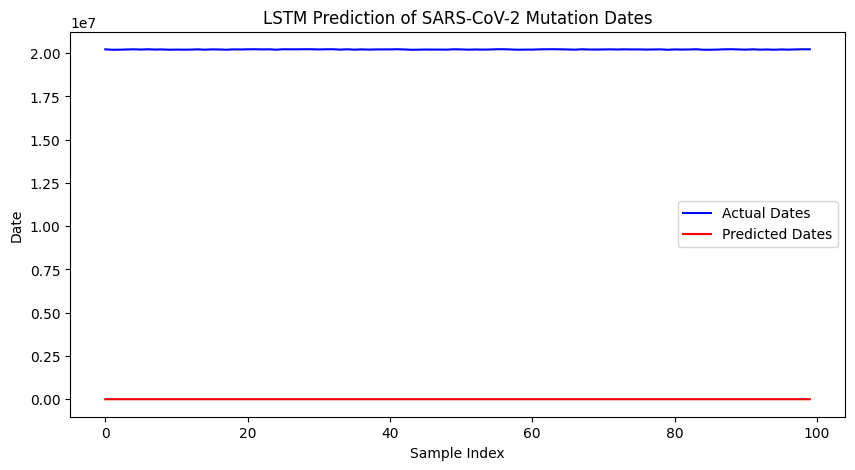

In [14]:
import matplotlib.pyplot as plt

# Plot actual vs predicted dates
plt.figure(figsize=(10, 5))
plt.plot(y_lstm[:100], label="Actual Dates", color='blue')
plt.plot(y_pred[:100], label="Predicted Dates", color='red')
plt.xlabel("Sample Index")
plt.ylabel("Date")
plt.legend()
plt.title("LSTM Prediction of SARS-CoV-2 Mutation Dates")
plt.show()


In [15]:
# Save processed dataset
df["Predicted_Date"] = y_pred
df.to_csv("processed_sars_cov2_mutation_data.csv", index=False)

# Save trained model
lstm_model.save("sars_cov2_lstm_model.h5")

print("Processed data and trained model saved successfully!")


Processed data and trained model saved successfully!
